# Udacity Project 2: TMDb Analysis  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis: Part I</a></li>
<li><a href="#eda2">Exploratory Data Analysis: Part II</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 

> 1. **Dependent Variable**: In algebra, when working with equations and graphs, within a dataset, there is a `dependent` variable whose value "depends" on how `independent` variables change. For this analysis, the `dependent variable` will be the `revenue`. 
> 2. **Independent Variables**: The `independent` variables represent a value, category or metric that changes over time and or is affected by external or internal conditions. For this analysis, the `independent` variables are: `popularity`, `vote_count`, `vote_average` and `genres`
> _cite 14_

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
sns.set(style="ticks", color_codes=True)

from datetime import datetime

import matplotlib 
from matplotlib import pylab, mlab, pyplot as plt
%matplotlib inline

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

<a id='wrangling'></a>
## Data Wrangling

> In this section, I have imported our main libraries as seen above, and will now load our `csv` file with specific parameters given some of the data in our columns contain seperators other than commas, and also checking that our dates are formatted to datetime objects. I will use `lambda` functions to make this process faster with `replace()` and `strptime`.

In [2]:
f = lambda x: (x.replace("|", ","))
date_parse = lambda x: pd.datetime.strptime(x, "%m/%d/%y")

df = pd.read_csv('tmdb-movies.csv', converters = {'cast': f,'director': f,'keywords': f,'genres': f, 'production_companies': f }, parse_dates=['release_date'], date_parser = date_parse)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


#### General Properties: 

> 1. When reviewing our data after it's been loaded I use built-in Pandas functions to get a sense of the breadth of our dataset. Those functions are `shape`, `info()`, `describe()`, `isnull()` and `value_counts()` to name a few.

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                2936 non-null object
director                10866 non-null object
tagline                 8042 non-null object
keywords                10866 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj     

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7930
director                   0
tagline                 2824
keywords                   0
overview                   4
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [407]:
df.release_year.value_counts()

2014    699
2013    658
2015    628
2012    586
2011    538
2009    531
2008    496
2010    487
2007    436
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

### Data Cleaning Steps:

> **Step 1:** Running `.head()` allows us to see the data I will be working with. In the above cell you can see the following column formatting issues: 

1. `homepage`,`tagline` are not needed for this analysis, I will drop these columns using `dropna`
2. `popularity` contain floating point values that could be reduced 2 decimal values using `round()` and `astype()`
3. `budget_adj`, and `revenue_adj` are scientific notation which I can also convert to float 2 decimal values.
4. I will run a check to see if any data is duplicated in our dataset using `duplicated()` and `drop_duplicates()`


In [7]:
df.drop(['homepage', 'tagline'], axis=1, inplace=True)

df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"monster,dna,tyrannosaurus rex,velociraptor,island",Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum().any()

False

In [10]:
print(df.duplicated().sum())

1


In [11]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [12]:
df['popularity'] = df['popularity'].round(1).astype(float)
df['budget_adj'] = df['budget_adj'].round(1).astype(float)
df['revenue_adj'] = df['revenue_adj'].round(0).astype(float)

In [13]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"monster,dna,tyrannosaurus rex,velociraptor,island",Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


> For future consideration, let's add another column in which I rank each row by revenue sorted descending using Pandas `rank()`

In [14]:
df['revenue_rank'] = df['revenue'].rank(ascending=0,method='dense')

In [62]:
df.sort_values('revenue', ascending=0).head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_rank
1386,19995,tt0499549,9.4,237000000,2781505847,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,"culture clash,future,space war,space colony,so...","In the 22nd century, a paraplegic Marine is di...",162,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09,1.0
3,140607,tt2488496,11.2,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"android,spaceship,jedi,space opera,3d",Thirty years after defeating the Galactic Empi...,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,2.0
5231,597,tt0120338,4.4,200000000,1845034188,Titanic,"Kate Winslet,Leonardo DiCaprio,Frances Fisher,...",James Cameron,"shipwreck,iceberg,ship,panic,titanic","84 years later, a 101-year-old woman named Ros...",194,"Drama,Romance,Thriller","Paramount Pictures,Twentieth Century Fox Film ...",1997-11-18,4654,7.3,1997,271692064.2,2.506406e+09,3.0
4361,24428,tt0848228,7.6,220000000,1519557910,The Avengers,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...",Joss Whedon,"new york,shield,marvel comic,comic,superhero",When an unexpected enemy emerges and threatens...,143,"Science Fiction,Action,Adventure",Marvel Studios,2012-04-25,8903,7.3,2012,208943741.9,1.443191e+09,4.0
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"monster,dna,tyrannosaurus rex,velociraptor,island",Twenty-two years after the events of Jurassic ...,124,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda...",2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,5.0


<a id='eda1'></a>
## Exploratory Data Analysis: Part I

> **Step 1:** Now that I've trimmed and cleaned our data, I will move on to exploration. In this section I will compute statistics and create visualizations based on our dataset sorted by revenue descending. Our research here will be focused on understanding why the top 100 revenue movies were so important and what were the variables that contributed to this achievement.

In [16]:
top_revenue = df.sort_values(by='revenue', ascending=False).head(100)
top_revenue.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_rank
1386,19995,tt0499549,9.4,237000000,2781505847,Avatar,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,"culture clash,future,space war,space colony,so...","In the 22nd century, a paraplegic Marine is di...",162,"Action,Adventure,Fantasy,Science Fiction","Ingenious Film Partners,Twentieth Century Fox ...",2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09,1.0
3,140607,tt2488496,11.2,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"android,spaceship,jedi,space opera,3d",Thirty years after defeating the Galactic Empi...,136,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot",2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,2.0
5231,597,tt0120338,4.4,200000000,1845034188,Titanic,"Kate Winslet,Leonardo DiCaprio,Frances Fisher,...",James Cameron,"shipwreck,iceberg,ship,panic,titanic","84 years later, a 101-year-old woman named Ros...",194,"Drama,Romance,Thriller","Paramount Pictures,Twentieth Century Fox Film ...",1997-11-18,4654,7.3,1997,271692064.2,2.506406e+09,3.0


In [17]:
top_revenue.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_rank
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,43314.780000,5.190000,1.542350e+08,8.979584e+08,130.070000,3475.060000,6.909000,2007.970000,1.570108e+08,9.654023e+08,50.500000
std,55833.708222,4.466203,6.694002e+07,3.189943e+08,25.168625,1839.603382,0.651199,6.817172,6.237636e+07,4.034864e+08,29.011492
min,11.000000,0.400000,1.050000e+07,6.118994e+08,88.000000,201.000000,5.600000,1977.000000,2.372625e+07,5.726906e+08,1.000000
25%,673.750000,2.775000,1.122500e+08,7.097980e+08,110.250000,2245.750000,6.400000,2004.750000,1.149844e+08,7.086393e+08,25.750000
50%,12299.500000,4.250000,1.500000e+08,8.079637e+08,132.000000,3169.500000,6.950000,2010.000000,1.565855e+08,8.776267e+08,50.500000
75%,69080.750000,6.100000,2.000000e+08,9.590500e+08,144.250000,4266.000000,7.400000,2013.000000,1.924616e+08,1.062875e+09,75.250000
max,211672.000000,33.000000,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.100000,2015.000000,3.683713e+08,2.827124e+09,100.000000


> `seaborn` scatter plot shows how `top 100 movie by revenue` increased over time while we see a `revenue` outlier in `2009` which was `Avatar`

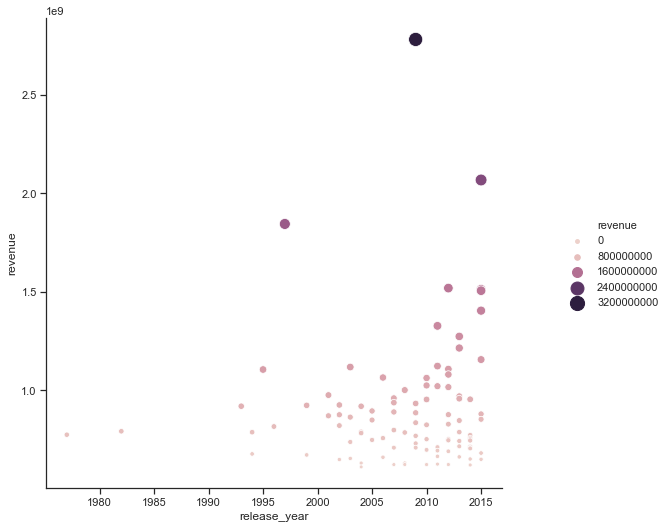

In [30]:
g=sns.relplot(x="release_year", y="revenue", hue="revenue", size="revenue", sizes=(15, 200), data=top_revenue);
g.fig.set_size_inches(10, 8)

> `seaborn` scatter plot shows how `top 100 movie by revenue` did not necessarily correlate with `popularity` and some outliers are present, `Jurassic World` was the most popular but, top 5 in `revenue` overall revenue.

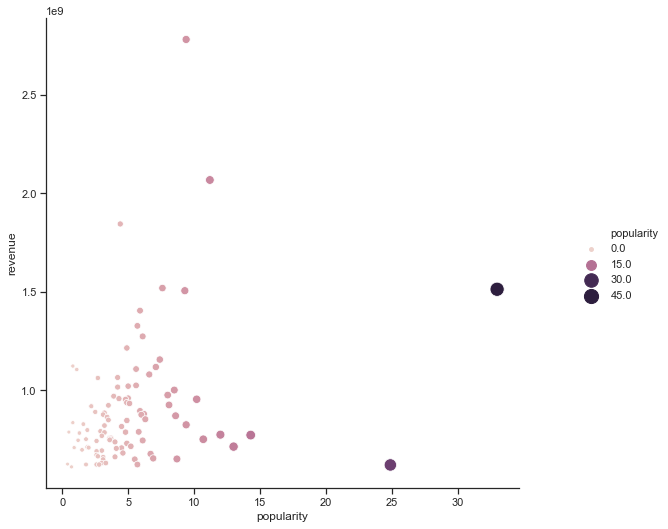

In [32]:
g=sns.relplot(x="popularity", y="revenue", hue="popularity", size="popularity", sizes=(15, 200), data=top_revenue);
g.fig.set_size_inches(10, 8)

> `matplotlib` bar chart shows `top 10 movie by revenue` and `budget` spend with `Avengers` as top highest in `budget` but, `7` in top `revenue`

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

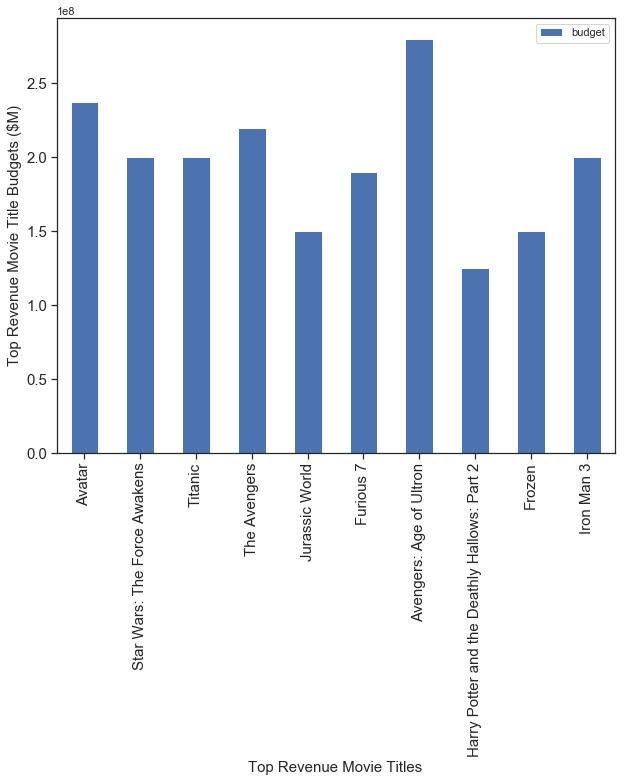

In [166]:
budget_to_title = top_revenue[['budget', 'original_title']].head(10)
budget_to_title.set_index("original_title", drop=True, inplace=True) # cite 11

budget_to_title.head(10).plot(kind='bar', figsize=(10,8), fontsize=15)
plt.xlabel('Top Budget Movie Titles', fontsize=15);
plt.ylabel('Top Movie Title Budgets ($M)', fontsize=15);
plt.xticks(rotation=90)

> `seaborn` scatter plot shows how `top 100 movie by revenue` did not always correlate in all cases with `budget` spend, meaning a movie could have had a high `budget` but, unfortunately that doesn't mean their `revenue` exceeded that

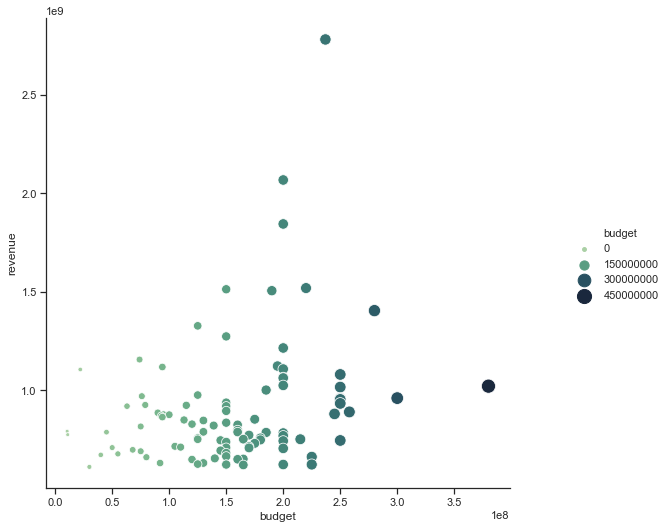

In [53]:
g=sns.relplot(x="budget", y="revenue", size="budget", hue="budget", sizes=(15, 200), palette="ch:r=-.5,l=.75", data=top_revenue);
g.fig.set_size_inches(10, 8)

> `matplotlib` histogram box plot shows `top 100 movie by revenue` `runtime` frequencies with `140` minutes top `runtime`

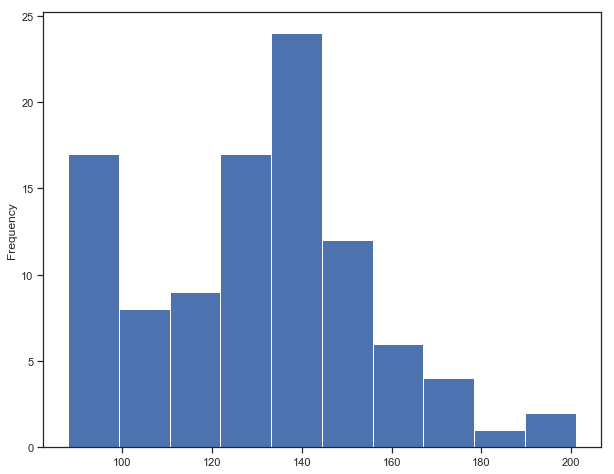

In [160]:
plt.figure(figsize=(10,8))
top_revenue.runtime.plot(kind='hist', bins=10)

> `matplotlib` histogram box plot shows `top 100 movie by revenue` `runtime` `mean()` was about `130` minutes and from `describe()` above we know `min` was `88` minutes and `max` was `201` minutes

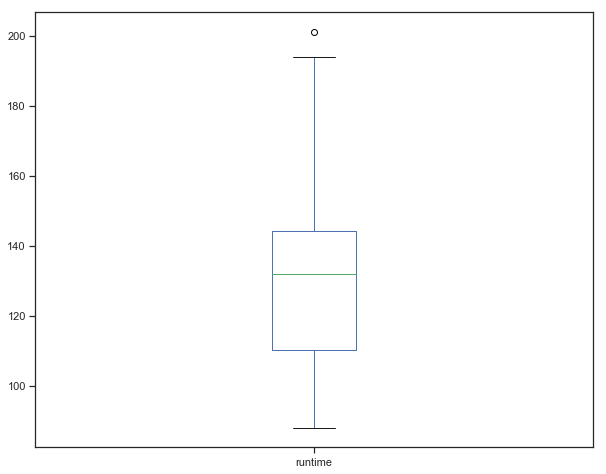

In [59]:
plt.figure(figsize=(10,8))
top_revenue.runtime.plot(kind='box')

> `matplotlib` histogram plot shows `top 100 movie by revenue` `voting average` frequencies and from `describe()` we know `min` and `max` were `5.6` and `8.1` respectively, while `25%`, `50%`, and `75%` interquartile ranges were `6.4`, `6.95` and `7.4` which we can see in the histogram

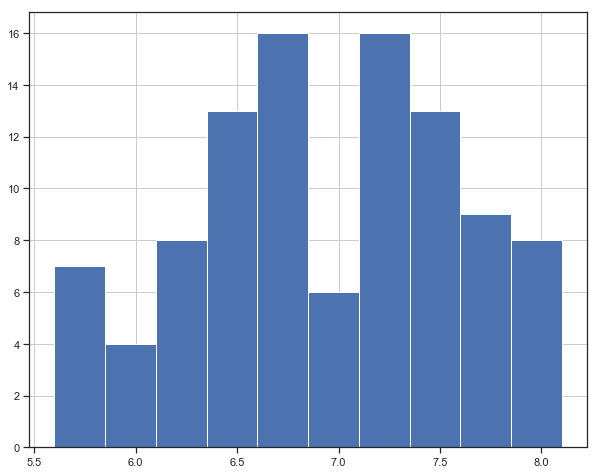

In [167]:
plt.figure(figsize=(10,8))
top_revenue.vote_average.hist();

> `seaborn` relplot shows `top 100 movie by revenue` `popularity` "zig zag" from about `1995` and then increase dramatically close to `2015` -- for additional research questions we can look into what was the data source for `popularity` and then compare that to other "popular rating" like sources to see if the "zig zag" was in fact the trend 

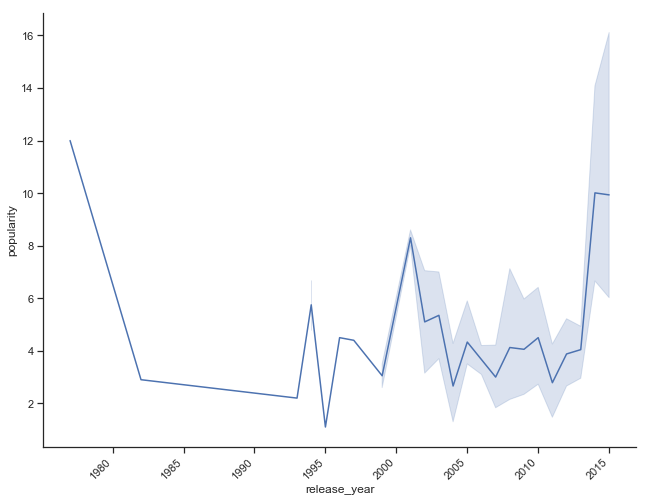

In [169]:
g = sns.relplot(x="release_year", y="popularity", kind="line", data=top_revenue)
g.fig.set_size_inches(10, 8)
g.fig.autofmt_xdate()
g.set_xticklabels(rotation=45)

> `seaborn` pairplot plot is a great way to visualize top metrics side by side, in each bar chart we can see in all cases of `popularity`, `revenue`, `budget` and `vote_count` the graph shapes are `right skewed` -- we learned in  `Udacity, Lesson 2 Descriptive Statistics Part II`, that `left skewed` is when the graph starts with low frequency and then slopes up while `right skewed` is when the graph starts with a high frequency and slopes down

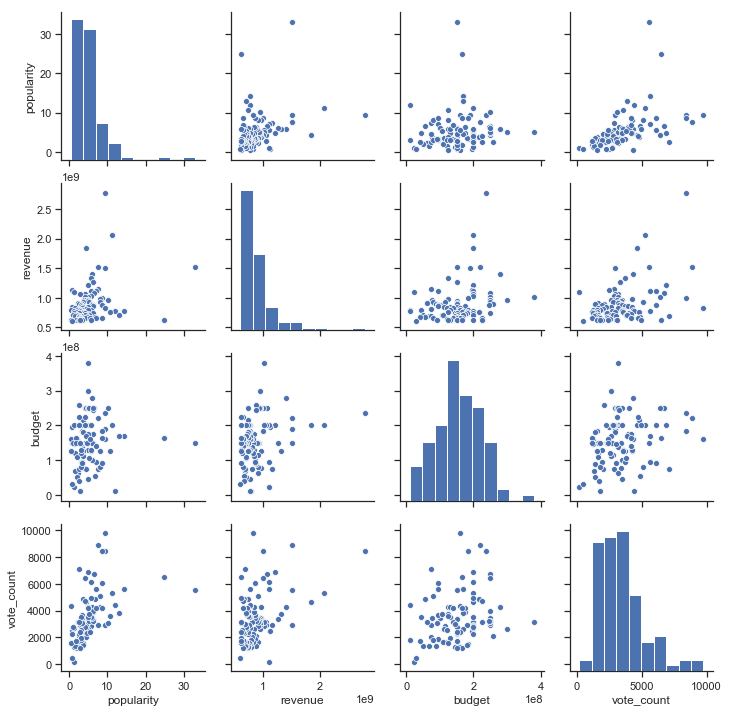

In [60]:
sns.pairplot(top_revenue[['popularity',
    'revenue',
    'budget',
    'vote_count']])
plt.show()

> `matplotlib` histogram shows the `top 100 movie by revenue` `genres` frequencies where most had unique `genres` but, some did have up to `7` different genre categorioes for `1` film -- in order to obtain this I converted a sorted, `value_counts()` of the `genres` column into a `DataFrame`, `reset_index()` and plotted by frequency count

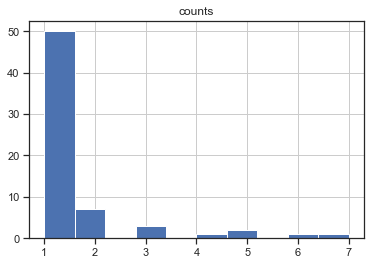

In [170]:
genres_list = top_revenue.genres.value_counts(dropna=True, sort=True) # cite 5 
df_genres_list = pd.DataFrame(genres_list)
df_genres_list = df_genres_list.reset_index()
df_genres_list.columns = ['genres', 'counts']
df_genres_list.hist(); # 65 total

> our `top 100 movie by revenue` `genres` column counts varied and there wasn't a true way to get top unique `genres` ranked by movie so instead, I took our `genres` list from above, used `split(",")` to seperate each genre completely, `reduce` that into a dataset and then create a `most_frequent_genre` function to use Pandas `Counter` method and count frequencies of `top 100 movie by revenue` total `genres` listed overall

In [173]:
import collections
from collections import Counter 
import functools

dataset = df_genres_list.genres.str.split(',')  # cite 6
genres_list_to_count = functools.reduce(lambda x,y: x + y, dataset)  # cite 7 

def most_frequent_genre(genres_list_to_count):  # cite 8 
    word_counter = collections.Counter(genres_list_to_count)
    for word, count in word_counter.most_common(1):
        return word_counter

genre_rated = most_frequent_genre(genres_list_to_count)
genre_rated

Counter({'Adventure': 44,
         'Fantasy': 21,
         'Action': 32,
         'Family': 22,
         'Science Fiction': 22,
         'Animation': 16,
         'Drama': 12,
         'Romance': 5,
         'Comedy': 14,
         'Thriller': 17,
         'Crime': 6,
         'Mystery': 5,
         'War': 1})

> `matplotlib` bar plot shows our `top 100 movie by revenue` `genres` overall with `Adventure` and `Action` being top `2` `genres`

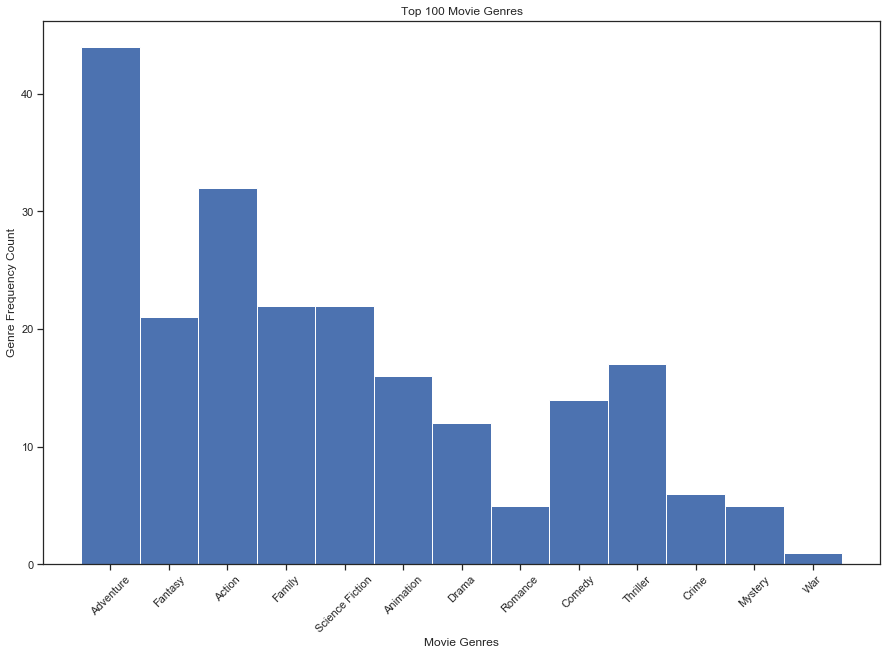

In [174]:
labels, values = zip(*Counter(genre_rated).items()) # cite 9

plt.figure(figsize=(15,10))
plt.xlabel('Movie Genres')
plt.ylabel('Genre Frequency Count')
plt.bar(labels, values, width=1) #color= ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.title('Top 100 Movie Genres')
plt.xticks(rotation=45)
plt.show()

> `seaborn.relplot ` provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets -- here we have a line plot showing relationship between `vote_average` and `release_year` where similar to our `release_year` and `popularity` plot above, we see similar zigzag with significant drop in `1995` and spikes in early `2000s` and then `2015`

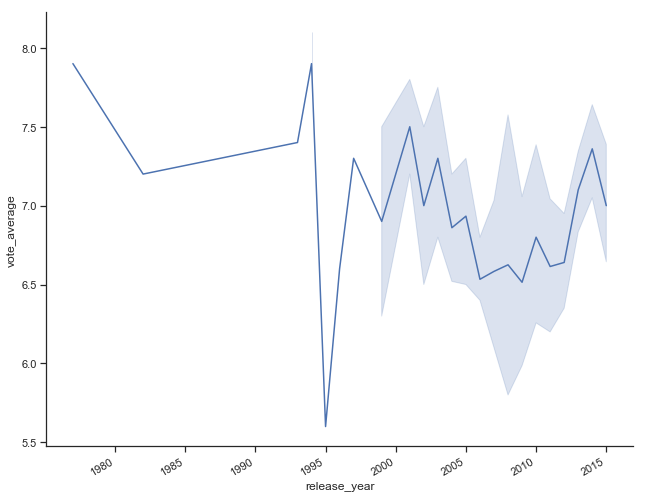

In [175]:
g=sns.relplot(x="release_year", y="vote_average", kind="line", data=top_revenue); # cite 2
g.fig.set_size_inches(10, 8)
g.fig.autofmt_xdate()

> similar to our `genres` frequency counter we can create the same plot for top `cast` members from out `top 100 movies by revenue` dataframe -- like `genres`, our `cast` members count varied per top movie title

In [176]:
import collections
from collections import Counter 
import functools

df_cast_list = pd.DataFrame(top_revenue.cast)
df_cast_list = df_cast_list.reset_index(drop=True)
df_cast_list.head() 

dataset = df_cast_list.cast.str.split(',')  # cite 6
cast_list_to_count = functools.reduce(lambda x,y: x + y, dataset)  # cite 7 

In [177]:
def most_frequent_cast(cast_list_to_count):  # cite 8 
    cast_counter = collections.Counter(cast_list_to_count)
    for actor, count in cast_counter.most_common(25):
        return sorted(cast_counter.most_common(), key=lambda i: {-i[1], i[0]})[:25]  # cite 10
    
cast_ranked = most_frequent_cast(cast_list_to_count)
dict(cast_ranked)

{'Daniel Radcliffe': 8,
 'Rupert Grint': 8,
 'Emma Watson': 8,
 'Ian McKellen': 8,
 'Orlando Bloom': 6,
 'Ralph Fiennes': 5,
 'Johnny Depp': 5,
 'Robert Downey Jr.': 4,
 'Scarlett Johansson': 4,
 'Vin Diesel': 4,
 'Shia LaBeouf': 4,
 'Gary Oldman': 4,
 'Denis Leary': 4,
 'Samuel L. Jackson': 4,
 'Jennifer Lawrence': 4,
 'Josh Hutcherson': 4,
 'Liam Hemsworth': 4,
 'Woody Harrelson': 4,
 'Kristen Stewart': 4,
 'Robert Pattinson': 4,
 'Taylor Lautner': 4,
 'Harrison Ford': 3,
 'Chris Evans': 3,
 'Paul Walker': 3,
 'Dwayne Johnson': 3}

> `matplotlib ` bar chart shows Daniel Radcliffe, Rupert Grint, Emma Watson, Ian McKellen as our top `cast` frequencies from our `top 100 movie by revenue` dataframe

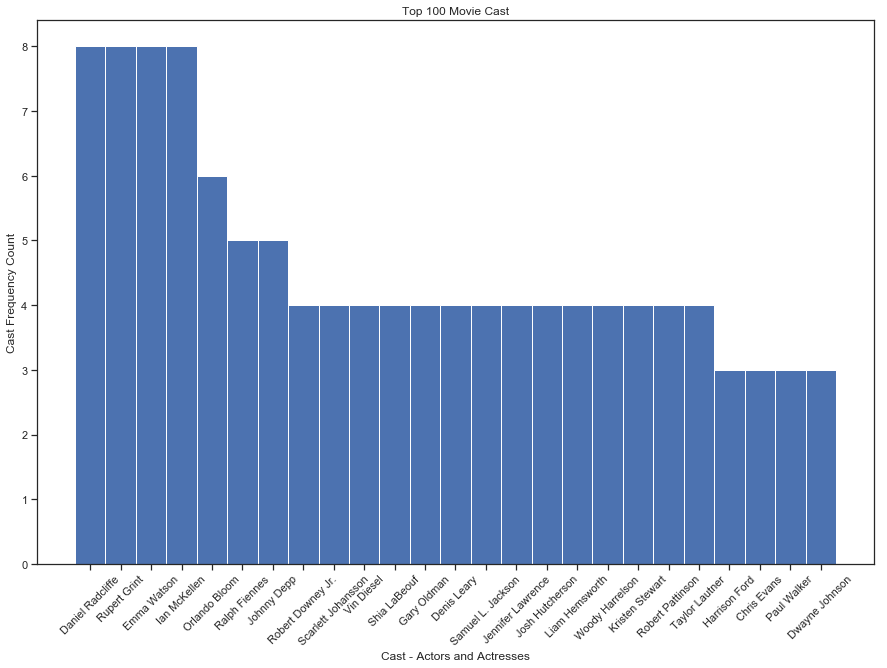

In [156]:
labels, values = zip(*cast_ranked) # cite 9

plt.figure(figsize=(15,10))
plt.xlabel('Cast - Actors and Actresses')
plt.ylabel('Cast Frequency Count')

plt.bar(labels,values,width=1) #color= ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.xticks(rotation=45)

plt.title('Top 100 Movie Cast')
plt.show()

<a id='eda2'></a>
## Exploratory Data Analysis: Part II

> **Step 2:** In this second part of our exploratory analysis we will look more into advanced statistical techniques like moving averages and standard deviation to try and see a trend line.

> `matplotlib` line chart shows our overall rolling mean average and standard deviation for revenue and this is revenue for the entire dataset

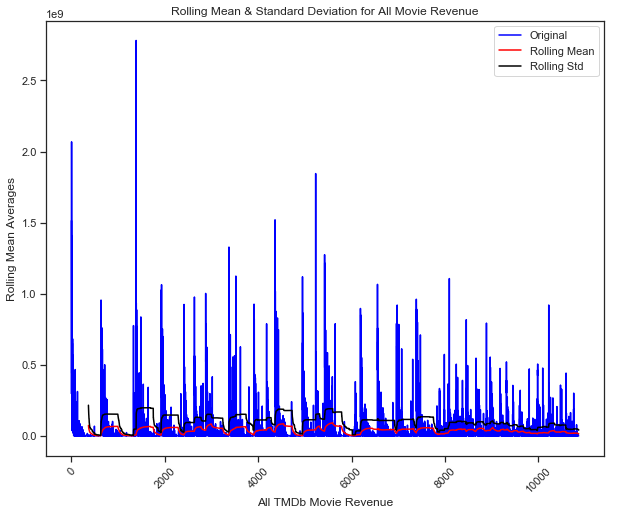

In [409]:
all_revenue = df.revenue

plt.figure(figsize=(10,8))
plt.xlabel('All TMDb Movie Revenue')
plt.ylabel('Rolling Mean Averages')
plt.xticks(rotation=45)

rolling_mean = all_revenue.rolling(window=365).mean() # cite 4
rolling_stdev = all_revenue.rolling(window=365).std() # cite 4

plt.plot(all_revenue, color='blue',label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_stdev, color='black', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for All Movie Revenue')
plt.show()

> `matplotlib` line chart used again shows rolling mean average and standard deviation for revenue and budget of the entire dataset

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text xticklabel objects>)

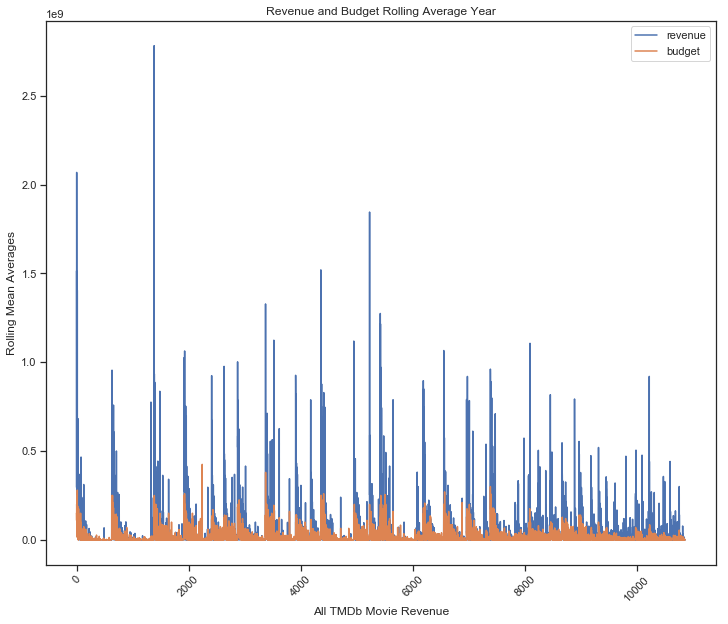

In [315]:
revenue_ma365 = df['revenue'].rolling(window=365).mean() # cite 3
budget_ma365 = df['budget'].rolling(window=365).mean()

result = pd.DataFrame({
    'revenue': revenue_ma365,
    'budget': budget_ma365
})

result.plot(title="Revenue and Budget Rolling Average Year")
plt.gcf().set_size_inches(12,10)
plt.xlabel('All TMDb Movie Revenue')
plt.ylabel('Rolling Mean Averages')
plt.xticks(rotation=45)

> `matplotlib` scatter plot shows a trend line for `revenue`, `budget` and `release_year` -- I had kept the dataframes from above and converted revenue to an `int` using `astype` with also using `concat` per Pandas documentation to combine these `3` dataframes successfully. The trend line in the chart include only the `revenue` and `release_year` and seems minimal with little to no curve. From the numpy documentation `polyfit` is a class method that uses a least squares method. 
> _cite 13_

In [373]:
revenue_ma365 = df['revenue'].rolling(window=1).mean()
revenue_ma365 = revenue_ma365.astype(int)
budget_ma365 = df['budget'].rolling(window=1).mean()
timeline = df['release_year']

frames = [revenue_ma365, budget_ma365, timeline]
merged_data_for_trend = pd.concat(frames, axis=1, sort=False)
merged_data_for_trend.head()

,revenue,budget,release_year
0,1513528810,150000000.0,2015
1,378436354,150000000.0,2015
2,295238201,110000000.0,2015
3,2068178225,200000000.0,2015
4,1506249360,190000000.0,2015


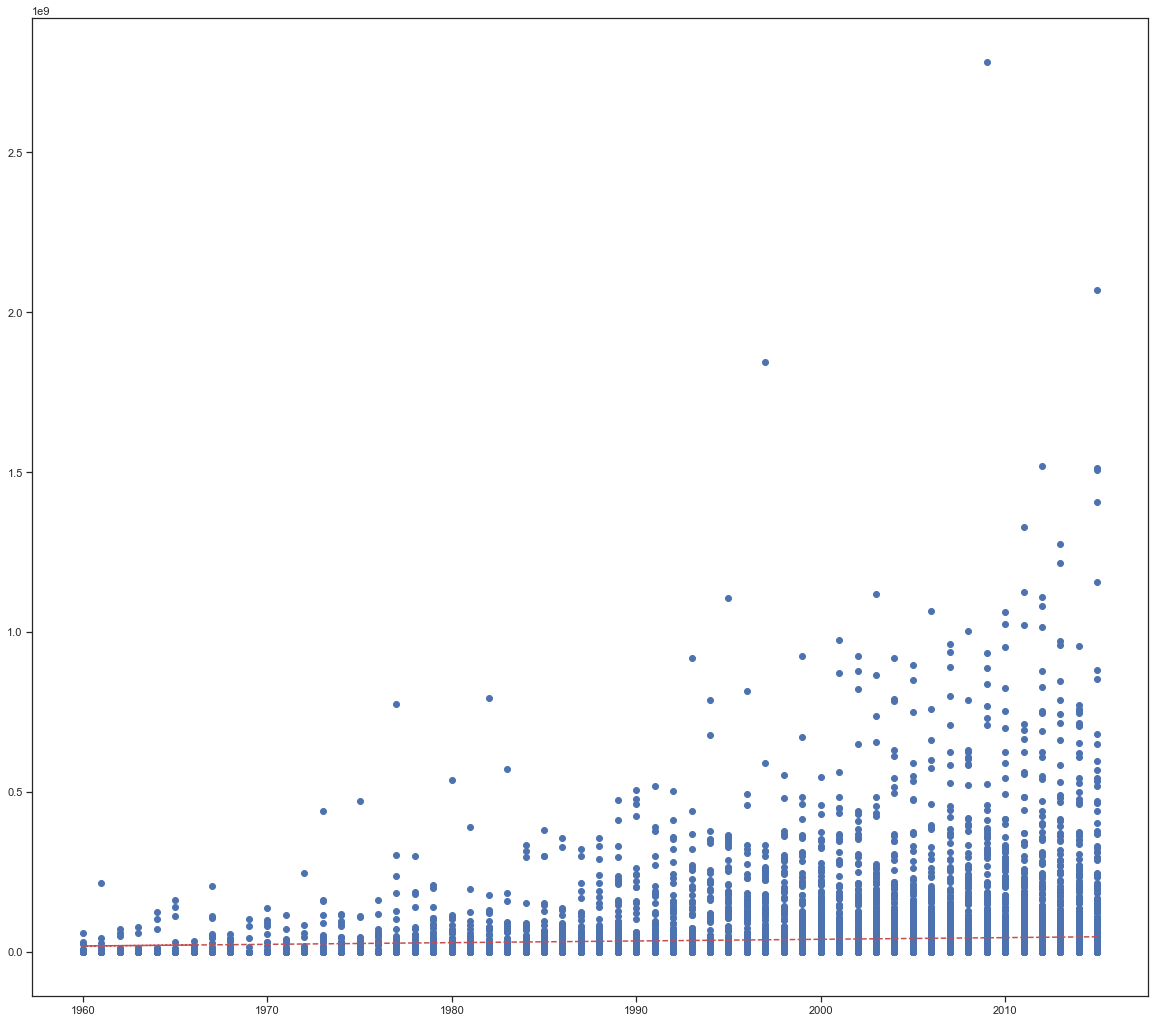

In [404]:
X = merged_data_for_trend.revenue 
Y = merged_data_for_trend.release_year 

fig = plt.figure(figsize=(20, 18)) 
fit = np.polyfit(x,y,1)  # cite 12 
plt.scatter(x, y) 
z = np.polyfit(x, y, 1) # cite 13
p = np.poly1d(z) 
plt.plot(x, p(x), "r--") 

<a id='conclusions'></a>
## Conclusions

> Overall, the findings from our top movies based on revenue exploratory analysis proved that revenue doesn’t necessarily correlate with outside variables like a “popularity” or  “vote” type ratings. Given these metrics were most likely from the TMDb website thru a user clickable action, there are many possibilities as to why popularity rating of 9.4 for the top revenue movie, “Avatar” paled in comparison to popularity rating of 33.0 for “Jurassic World” which was top 5 in the top revenue dataset. Our seaborn “relplot” which looks at the “relationship” between two variables showed that it could be true that movie popularity ratings could continue to grow beyond 2015.

> A similar outcome for vote count and vote average was found. The vote average in the interquartile range 25% and 50% were very similar at ~6.4 and ~6.95 respectively. 

> Another independent variable I looked at was runtime, and thru a box plot I saw that the mean was about ~130 runtime minutes for top revenue movies while max runtime was 201 minutes. The interquartile ranges were closely related at ~110, ~132, and ~144. This could infer that top movies need to be at about this runtime length and anything longer than the mean might change the outcome for the movie goer. 

> Looking at budget for top 10 movie by revenue and we found that “Avengers: Age of Ultron” had the highest budget spend but, was not a top revenue movie. This was a similar case when we implemented the seaborn scatter plots comparing revenue to budget over time. 

> Combining popularity, revenue, budget, and vote count on a seaborn pairplot I found that the bar charts were all slightly right skewed meaning the graph starts with a high frequency and then tapers off and in many cases the mean is greater than the median. One reason for right skewed graphs could be lower bound data. (cite 15)

> The next and more exciting challenge was determining if cast members or genres had any impact on the top 100 movie by revenue and because these values varied in count, extracting data from these columns was more complex. 

> I decided to use Pandas method “Counter” which essentially can take a list and then count the number of time a word or string occurs in that list. For both genres and cast, I converted each to a list and ran the Counter method on that to see the frequency counts.

> From there a histogram and bar chart showed top genres for our top 100 movies by revenue which were “Adventure” and “Action” while top cast were “Daniel Radcliffe” and “Rupert Grint”. These are popular actors and the conclusion here would be that going forward creating a movie in either of these genres and or with these cast members might just turn out to be a top revenue grossing movie.

> Lastly, the part II analysis walked the entire dataframe without any filters, to view moving average and standard deviation on revenue, and budget, with release year to try and find a trend to determine if there was a trend in revenue or budget increasing over time. The outcome here was for all time revenue the rolling mean and rolling standard deviation was consistent for both budget and revenue while the trend line for revenue was neither increasing or decreasing.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [411]:
# Citations:
# 1: https://learning.oreilly.com/library/view/matplotlib-for-python/9781788625173/3599a25f-7017-4b53-ac4a-c0ad1e693350.xhtml
# 2: https://seaborn.pydata.org/generated/seaborn.relplot.html
# 3: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787123137/15/ch15lvl1sec130/performing-a-moving-average-calculation
# 4: https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000
# 5: https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
# 6: https://www.geeksforgeeks.org/python-program-split-join-string/
# 7: https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
# 8: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
# 9: https://stackoverflow.com/questions/19198920/using-counter-in-python-to-build-histogram
# 10: https://stackoverflow.com/questions/51550654/how-to-sort-list-by-frequency-and-alphabetically/51550683#51550683
# 11: https://markhneedham.com/blog/2018/12/21/pandas-plot-x-axis-index/
# 12: https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas
# 13: https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
# 14: https://www.khanacademy.org/math/pre-algebra/pre-algebra-equations-expressions/pre-algebra-dependent-independent/a/dependent-and-independent-variables-review
# 15: https://www.itl.nist.gov/div898/handbook/eda/section3/histogr6.htm